# **ETF ou réplication d'indice**

##**Projet de programmation, Mai 2022** 
Ines Vanheuverswyn et Ulysse Guegan


# **Table des matières**


0  **Introduction**


I.   **Réplication physique partielle de l'indice XLE par la méthode des moindres carrés non négatifs**

1.   Réplication de l'indice à partir des actifs de XLE

* 1.1  Récolte des données 

* 1.2  Nettoyage de la base de données  

* 1.3  Création du portefeuille 

* 1.4  Résultats sur la période d’apprentissage 

* 1.5  Résultats de la réplication partielle anticipée 

* 1.6  Evaluation de l'erreur de suivi ou "Tracking Error"


2.   Réplication de l'indice à partir de tous types d'actifs

* 2.1  Création de la fonction globale applicable à tous types d'actions

* 2.2  Application aux 10 plus grands actifs de XLE et de ANRJ MSCI et comparaison avec IYE, un ETF professionnel



II.   **Réplication de l'indice XLE en utilisant les corrélations entre le cour de l'indice et celui des actifs** 

1. Calcul des coefficients de corrélation et de corrélation partielle
2. Création du portefeuille 
3. Comparaison du cours de l'ETF réalisé et de l'indice de référence
4. Réplication partielle anticipée 
5. Création de la fonction globale applicable à tous types d'action

III. **Résultats obtenus**

IV. **Conclusion**

V. **Difficultés rencontrées** 

Annexes

1. annexe 1 comparaison ETF et indice
2. annexe 2 Test Unitaire




# **Introduction**
S’il n'est pas possible de négocier **--> d'investir sur** un indice comme celui du CAC40 ou du S&P 500 directement, il est possible de bénéficier de leur évolution en investissant sur les fonds négociés en bourse (ETF). 

Les premières tentatives de création de ce qui ressemble le plus à un ETF sont apparu en 1989 avec l’Index Participation Shares sur le S&P 500 et depuis quelques années les ETF ont gagné en popularité auprès du grand public.

Les **Exchange Traded Fund**(ETF) sont des fonds d'investissement émis par une société de gestion. Ils peuvent être achetés et revendu sur le marché de la même façon que des actions.Investir dans un fond, et donc dans un ETF, permet d’investir dans la totalité des titres qui le compose. Le fond indiciel réplique l'évolution de l'indice boursier en achetant les mêmes actifs que l'indice. Son but n’est pas d’obtenir la meilleure performance possible à partir de ses actions mais de répliquer l’indice boursier. La performance de l’ETF peut être évaluée par **la Tracking Error** qui sera défini par la suite.

Les ETF accumulent beaucoup d'avantages. Tout d’abord, ils rendent le placement financier plus **accessible** surtout pour ceux qui commencent en bourse : investir en gestion indicielle est plus simple que d’investir dans des sélections d’actions. Aussi investir avec les fonds indiciels demande moins de compétences et donc des **frais de gestion moins importants**. Enfin permettent de mettre en place diverses stratégies, visant à augmenter les gains, **réduire la volatilité** ou le **risque**.

Il en existe trois types, la **réplication physique totale**, la **réplication physique partielle** et la **réplication synthétiques**. Une réplication physique totale réplique la performance de son indice de référence en achetant les mêmes titres qui composent l'indice, et dans les mêmes proportions. Investir dans un ETF physique revient exactement au même que d'acheter la totalité des titres qui composent l'indice. Cependant, l'exécution d'un tel portefeuille peut être complexe, car il peut être composé de milliers d'actions. Aussi un portefeuille constitué de tous les actifs peut incorporer trop de petites actions et d'actions illiquides donc des actions risquées. Enfin, l'allocation du capital à tous les actifs augmente considérablement les frais de commission puisque chaque actif est associé à une transaction distincte. C’est pourquoi il peut être stratégique de le répliquer partiellement en sélectionnant les titres qui ont la plus grande part dans la performance de l’indice. 

Un ETF synthétique est une sorte de réplication d’ETF partielle qui utilise un swap. Un swap est un contrat qui permet de faire courir le risque que l’ETF sous-performe à un autre agent. Le fonctionnement de l’ETF synthétique est très simple : lorsque la performance de l’indice de référence est supérieure à celle des actifs physiquement détenus par la société de gestion, la contrepartie doit payer la différence de performance à cette dernière. 

La réplication synthétique est intéressante pour contourner certaines législations, par exemple certains livret doivent être composés d’un certain pourcentage d’actions européennes. Cependant l’ETF PEA (plan d'epargne action) permet grâce aux swap de suivre l’indice S&P 500 . Ainsi on peut profiter d'investissements défiscalisés et exposer la croissance de différentes régions du monde avec certains ETF synthétiques.
 
### **Objectif du projet**
L'objectif de ce projet est de répliquer l'indice XLE en utilisant une sélection optimale de portefeuille des plus grands actifs de l'indice en réduisant la Tracking Error. 
XLE est un indice du secteur énergétique composée des plus grandes compagnies americaines dont notamment Exxon Mobil et Chevron. ANRJ MSCI est son equivalent europeen et est composée d'entreprises telles que Shell ou Total.

Nous répliquerons l'indice de deux methodes différentes, par la **méthodes des moindres carrés à coefficients positifs**(I), puis en utilisant des mesures de **corrélation entre le cours de l'indices et de nos dix actifs**(II). 

A chaque fois nous essaierons de répliquer partiellement l'indice XLE à l’aide des **dix principales actions de l'indice XLE** dans un premier temps, puis nous essaierons de suivre l'indice a partir d'**actifs de l'ETF européen ANRJ MSCI**. Cette deuxième réplication permettra de mieux évaluer quelle méthode nous paraît la plus optimale au vu des Tracking Error. Pour comparer avec un ETF professionnel nous comparerons les Tracking Error établi pour nos ETF avec celui de l'ETF IYE, sensé suivre l'indice XLE.

Nous nous baserons sur les données yahoo finance de fin 2019 pour construire nos ETF. Nous utiliserons aussi les données de fin 2020 pour évaluer la pertinance des ETF en comparant les cours de ces ETF et de l'indice pour l'année suivant celle permettant de constituer l'ETF. 



 

In [ ]:
!pip install iexfinance


In [ ]:
from bs4 import BeautifulSoup
import iexfinance
import matplotlib
import matplotlib.pyplot as plt
import re
import requests
import numpy as np
import pandas as pd
from iexfinance.stocks import Stock
import os
from scipy.optimize import nnls
import math
from scipy import stats, linalg
 

# **I. Réplication physique partielle de l'indice XLE par la méthode des moindres carrés non négatifs**


Afin de concevoir un portefeuille, nous utilisons les données historiques de l'indice et des actifs sous-jacents. En fait, il s'agit d'un problème de régression dans lequel nous essayons de trouver un portefeuille qui minimise la Tracking Error..
Nous la définissons comme suit:

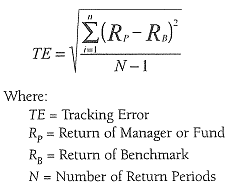
 
 
 En particulier, considérons un indice composé de N=10 actifs et désignons par Perf_Holding  et Perf_indice les rendements des actifs et de l'indice sur les T derniers jours, respectivement. Comme nous prenons une période longue T ≥ N, c'est-à-dire que le problème est bien défini, nous pouvons toujours retrouver les poids de chaque indice dans l'ETF dans un ajustement typique des moindres carrée.

Nous allons  utiliser la méthode des moindres carrés non négatifs.
L'idée est d'ajuster une combinaison linéaire des 10 principaux composants actuels par rapport aux valeurs de cloture de l'indice dans un modèle linéaire contraint des moindres carrés. Les coefficients obtenus seront alors non-négatifs puisque nous nous limitons au cas où le portefeuille est long only(on ne peut qu'acheter les actifs). En sommant les pondérations nous obtiendrons le montant de l'effet de levier dont le portefeuille a besoin pour répliquer le prix de l'indice.


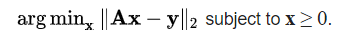

Devient le problème à résoudre. 
A représente les valeurs de sortie à chaque période des dix actifs, y celles de l'indice et x les pondérations recherchées.


Nous repliquons d'abord l'indice à partir des dix principales actions de XLE (1) ceci nous permet de segmenter le problème en plusieurs morceaux, puis nous automatisons le processus pour pouvoir répliquer l'indice avec n'importe quelles actions(2).

Il est nécessaire réaliser une première simplification du problème nécessaire à la régression linéaire, nous supposons les cours des actifs indépendants entre eux. Cette hypothèse simplificatrice est questionnable car ce sont des actifs d'une même région et d'un même secteur. 


## **1.  Réplication de l'indice à partir des actifs de XLE**



Nous avons diviser le problème en plusieurs partie: l'automatisation de la récupération des données, le nettoyage de la base de données récupérée, création de l'ETF, l’évaluation de sa coherence en comparant les cours sur l’année 2019 et l'application de cet ETF sur l’année 2020.

###  **1.1  Récolte des données**

In [ ]:
#on a récupéré les 10 principaux actifs de XLE
etf_symbol = ['XOM', 'CVX', 'COP', 'EOG', 'SLB', 'MPC', 'PXD', 'OXY', 'VLO', 'WMB']

In [ ]:
# fonction pour automatiser la recuperation des données 
#on choisit la fin de l'annee 2019 comme periode
def holdings_scrapping_2019(etf_symbol):
    '''
    etf_symbol: str
    
    return: pd.DataFrame
    '''
    link = 'https://finance.yahoo.com/quote/{}/history?period1=1419984000&period2=1577750400&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true'.format(etf_symbol)
    r = requests.get(link, headers = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'})
    data = pd.read_html(r.text)[0]
    df =pd.DataFrame(data)
    df=df.iloc[0:100]
    return(df)




In [ ]:
#creation d'un data frame avec le cours des actifs
df = pd.DataFrame({Holding : holdings_scrapping_2019(Holding).iloc(1)[4] for Holding in etf_symbol})
df

,XOM,CVX,COP,EOG,SLB,MPC,PXD,OXY,VLO,WMB
0,69.48,119.85,64.61,82.39,40.40,59.67,150.87,40.70,92.88,23.20
1,69.89,120.30,64.98,83.14,40.00,60.38,0.44 Dividend,40.16,93.20,23.59
2,70.13,120.60,65.00,83.65,40.07,60.47,151.78,40.15,94.42,23.81
3,70.02,120.34,64.67,83.81,40.65,60.97,152.08,39.89,95.10,23.84
4,70.29,120.33,64.60,83.38,40.79,60.66,151.80,39.71,95.24,23.94
...,...,...,...,...,...,...,...,...,...,...
95,67.25,1.19 Dividend,50.91,74.94,32.72,46.22,124.61,44.57,76.72,23.28
96,67.65,116.95,51.78,75.02,31.65,45.40,123.01,43.96,76.00,22.92
97,70.49,117.74,53.87,78.52,32.34,44.63,122.72,43.70,78.74,23.11
98,69.63,122.39,53.12,77.92,34.63,47.15,128.36,44.76,77.15,23.89


In [ ]:
#creation d'un data frame avec le cours de l indice
Ytest = pd.DataFrame({'XLE' : holdings_scrapping_2019('XLE').iloc(1)[4]})
Ytest

,XLE
0,59.70
1,1.791 Dividend
2,61.68
3,61.94
4,61.96
...,...
95,58.28
96,57.02
97,56.28
98,56.63



###  **1.2  Nettoyage de la base de données**

Nous remarquons qu'a certaines dates, la valeur récupérée n'est pas celle de la valeur de clôture mais celle d'un dividende.
Nous supprimons toutes les lignes pour lesquelle ce phénomène apparaît.
Pour cela nous supprimons une ligne dès lors qu'une de ses valeurs fini par "Dividend".

In [ ]:
#Nettoyage de la base de données
L = []
for k in etf_symbol:
  for j in range(100):
    if df[k][j].endswith('Dividend'):
      L.append(j)
for j in range(100):
  if Ytest["XLE"][j].endswith('Dividend'):
    L.append(j)

Closes_XLE10 = df.drop(L)
Yfinal = Ytest.drop(L)
Yfinal

,XLE
0,59.70
2,61.68
3,61.94
4,61.96
5,61.99
...,...
92,57.90
94,57.79
96,57.02
97,56.28


###  **1.3  Création du portefeuille** 


Nous construisons le portefeuille en prenant A une matrice qui comporte les cours des dix actifs et b un vecteur qui decrit le cours de l'indice à répliquer.

Nous construisons une première fonction qui construit les allocations puis une fonction qui appelle la première fonction pour en plus de renvoyer les allocations et le coefficient de levier renvoie les graphiques correspondants.
Cette fusion permet de plus facilement automatiser le processus par la suite.

In [ ]:
A=Closes_XLE10.values
A.shape
b=Yfinal.values
b.shape
b_vect=np.reshape(b, -1)

In [ ]:
def test_nnls(Perf_Holding, Perf_indice):
  ''' la fonction nnls (Non-negative Least Squares) prend en entrée un data Frame et un vecteur
  et renvois un couple composé d'un array (Solution vectorielle) et float (le residu, || Ax-b ||_2)
  '''
  result = nnls(Perf_Holding, Perf_indice)
  return result
test_nnls(Closes_XLE10, b_vect)


(array([0.25252802, 0.07679228, 0.        , 0.        , 0.14501812,
        0.        , 0.06286125, 0.        , 0.06806543, 0.56374522]),
 7.963941356578666)

In [ ]:
def construction_portfolio_allocation(Perf_Holding, Perf_indice):
  ''' la fonction nnls (Non-negative Least Squares) prend en entrée un data Frame et un vecteur
  et renvois un couple composé d'un array (Solution vectorielle) et float (le residu, || Ax-b ||_2)
  '''
  result = nnls(Perf_Holding, Perf_indice)
  leverage_factor = sum(result[0])
  weights = result[0] / leverage_factor
  weights = dict(zip(Perf_Holding.columns, weights))
  return result, leverage_factor, weights 


In [ ]:
def portfolio_allocation(Perf_Holding, Perf_indice):
  result, leverage_factor, weights=construction_portfolio_allocation(Perf_Holding, Perf_indice)
  print('NNLS Residual', round(result[1],5))
  print('result of the NNLS = ',result)

  print("\nPortfolio Allocation:")
  allocation = pd.DataFrame({'Component':list(weights.keys()),'Weight(%)':np.multiply(list(weights.values()),100)}).sort_values('Weight(%)',ascending=False)
  allocation.set_index('Component',inplace=True)
  allocation.plot.pie(y='Weight(%)',legend=None)
  allocation.reset_index(inplace=True)
  display(allocation)
  print("\nLeverage Factor:", leverage_factor)
  return result, leverage_factor, weights
  


NNLS Residual 7.96394
result of the NNLS =  (array([0.25252802, 0.07679228, 0.        , 0.        , 0.14501812,
       0.        , 0.06286125, 0.        , 0.06806543, 0.56374522]), 7.963941356578666)

Portfolio Allocation:


,Component,Weight(%)
0,WMB,48.224144
1,XOM,21.601864
2,SLB,12.405205
3,CVX,6.568999
4,VLO,5.822483
5,PXD,5.377305
6,COP,0.000000
7,EOG,0.000000
8,MPC,0.000000
9,OXY,0.000000



Leverage Factor: 1.1690103094837967


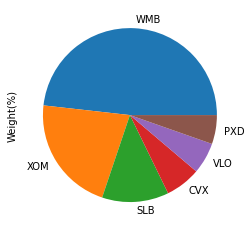

In [ ]:
result, leverage_factor, weights= portfolio_allocation(Closes_XLE10, b_vect)




### **1.4  Résultats  sur la période d'apprentissage**


Nous vérifions que l'ETF et l'indice évoluent de façon similaire sur la période d'apprentissage, c'est a dire la période sur laquelle nous nous sommes basés pour calculer les pondérations optimales. 

(Les Listes L permettent de retransformer certaines valeurs en float.)

In [ ]:
n,m = A.shape
L2 = []
for i in range(n):
  L3 = []
  for j in range(m):
    L3.append(float(A[i,j]))
  L2.append(L3)
L2 = np.array(L2)

In [ ]:
C = Yfinal['XLE'].values
n = len(C)
L4 = []
for i in range(n):
  L4.append(float(C[i]))
L4 = np.array(L4)

In [ ]:
Yfinal['NNLS Close'] = leverage_factor*L2.dot(list(weights.values()))
Yfinal['XLE'] = L4
Yfinal = Yfinal[::-1]
Yfinal

,XLE,NNLS Close
0,59.70,58.792101
2,61.68,57.634065
3,61.94,56.480776
4,61.96,57.745273
5,61.99,57.987183
...,...,...
92,57.90,61.959751
94,57.79,62.426847
96,57.02,62.290828
97,56.28,62.172406


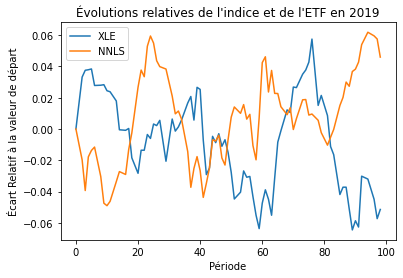

In [ ]:
def Evolve(Actif):
  return (Actif-Actif[0])/Actif[0]

    
Graph = pd.DataFrame({'XLE': Evolve(Yfinal['XLE']), 'NNLS': Evolve(Yfinal['NNLS Close'])})
Graph.plot()
plt.title('Évolutions relatives de l\'indice et de l\'ETF en 2019')
plt.ylabel('Écart Relatif à la valeur de départ')
plt.xlabel('Période')
plt.show()


###  **1.5  Réplication partielle anticipée**

Il serait interressant d’évaluer la performance de cet ETF après cette période d'apprentissage afin de s'assurer de ses capacités à suivre l'indice.
Nous avons donc récupéré les données un ans après (en 2020) et comparé l’évolution de la close value de l'ETF précédemment construit avec celui de l'indice.

In [ ]:
#recuperation des cours pour les actifs 

def holdings_scrapping_2020(etf_symbol):
    '''
    etf_symbol: str
    
    return: pd.DataFrame
    '''
    link = 'https://finance.yahoo.com/quote/{}/history?period1=1419984000&period2=1609372800&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true'.format(etf_symbol)
    r = requests.get(link, headers = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'})
    data = pd.read_html(r.text)[0]
    df =pd.DataFrame(data)
    df=df.iloc[0:100]
    return(df)

#on choisit la fin de l'annee 2020 comme periode



In [ ]:
df_2020 = pd.DataFrame({Holding : holdings_scrapping_2020(Holding).iloc(1)[4] for Holding in etf_symbol})
Ytest_2020 = pd.DataFrame({'XLE' : holdings_scrapping_2020('XLE').iloc(1)[4]})


In [ ]:
#Nettoyage de la base de données
L_2020 = []
for k in etf_symbol:
  for j in range(100):
    if df_2020[k][j].endswith('Dividend'):
      L_2020.append(j)
for j in range(100):
  if Ytest_2020["XLE"][j].endswith('Dividend'):
    L_2020.append(j)

Closes_XLE10_2020 = df_2020.drop(L_2020)
Yfinal_2020 = Ytest_2020.drop(L_2020)

In [ ]:
A_2020=Closes_XLE10_2020.values
b_2020=Yfinal_2020.values

n,m = A_2020.shape
L2_2020 = []
for i in range(n):
  L3_2020 = []
  for j in range(m):
    L3_2020.append(float(A_2020[i,j]))
  L2_2020.append(L3_2020)
L2_2020 = np.array(L2_2020)

In [ ]:
C_2020 = Yfinal_2020['XLE'].values

n = len(C_2020)
L4_2020 = []
for i in range(n):
  L4_2020.append(float(C_2020[i]))

L4_2020 = np.array(L4_2020)

In [ ]:
Yfinal_2020['NNLS Close'] = leverage_factor*L2_2020.dot(list(weights.values()))
Yfinal_2020['XLE'] = L4_2020
Yfinal_2020 = Yfinal_2020[::-1]


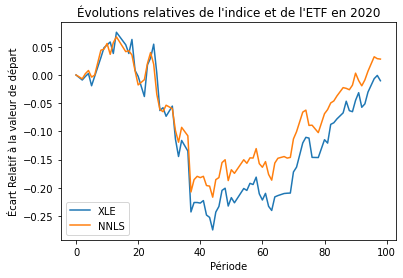

In [ ]:
def Evolve(Actif):
  return (Actif-Actif[0])/Actif[0]

    
Graph_2020 = pd.DataFrame({'XLE': Evolve(Yfinal_2020['XLE']), 'NNLS': Evolve(Yfinal_2020['NNLS Close'])})
Graph_2020.plot()
plt.title('Évolutions relatives de l\'indice et de l\'ETF en 2020' )
plt.ylabel('Écart Relatif à la valeur de départ')
plt.xlabel('Période')
plt.show()

### **1.6  Evaluation de l'erreur de suivi ou "Tracking Error"**

Afin d’évaluer la fiabilité de l'indice construit avec cette méthode, nous allons calculer la tracking error, plus sa valeur est faible plus la méthode est optimale.

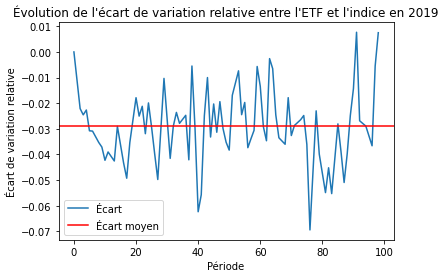

In [ ]:
#Evolution de l'écart de variation relative entre l'ETF et l'indice en 2019

Graph['Dif']=Graph['NNLS']-Graph['XLE']
Graph['Dif'].plot()
G = Graph['Dif'].mean()
plt.axhline(y= G, color='r', linestyle='-')
plt.title('Évolution de l\'écart de variation relative entre l\'ETF et l\'indice en 2019' )
plt.ylabel('Écart de variation relative')
plt.xlabel('Période')
plt.legend(['Écart','Écart moyen'])
plt.show()

In [ ]:
#Évaluation de l'erreur de suivi en 2019

Graph['Square']=Graph['Dif']**2
TrackingError = (Graph['Square'].sum()/(len(Graph['Square'])-1))**(1/2)
TrackingError

0.03261123169102075

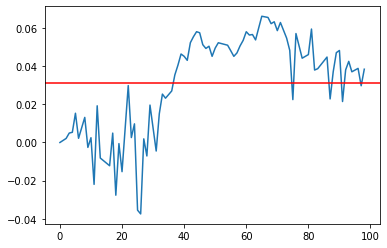

In [ ]:
#Evolution de l'écart entre l'ETF à l'indice en 2020

Graph_2020['Dif']=Graph_2020['NNLS']-Graph_2020['XLE']
Graph_2020['Dif'].plot()
G = Graph_2020['Dif'].mean()
plt.axhline(y= G, color='r', linestyle='-')
plt.show()

In [ ]:
#Évaluation de l'erreur de suivi en 2020

Graph_2020['Square']=Graph_2020['Dif']**2
TrackingError_2020 = (Graph_2020['Square'].sum()/(len(Graph_2020['Square'])-1))**(1/2)
TrackingError_2020

0.04088521127769959

## **2. Réplication de l'indice à partir de tous types d'actifs**

Nous automatisons le processus d'attribution d'allocations par la méthode NNLS pour pouvoir répliquer l'indice avec n'importe quelles actions. Puis nous l'appliquons aux actifs de l'indice Européen. 

### **2.1 Création de la fonction globale applicable à tous types d'actions**

In [ ]:
def Etf(Liste_Actions):

  print('2019: Période d\'apprentissage')
  print('')

  #Récolte des données pour 2019

  df = pd.DataFrame({Holding : holdings_scrapping_2019(Holding).iloc(1)[4] for Holding in Liste_Actions})
  Ytest = pd.DataFrame({'XLE' : holdings_scrapping_2019('XLE').iloc(1)[4]})

  #Nettoyage des bases de données

  L = []
  for k in Liste_Actions:
    for j in range(100):
      if df[k][j].endswith('Dividend'):
        L.append(j)
  for j in range(100):
    if Ytest["XLE"][j].endswith('Dividend'):
      L.append(j)
  Closes_XLE10 = df.drop(L)
  Yfinal = Ytest.drop(L)

  #Création du Portefeuille

  A=Closes_XLE10.values
  A.shape
  b=Yfinal.values
  b.shape
  b_vect=np.reshape(b, -1)
  result, leverage_factor, weights= portfolio_allocation(Closes_XLE10, b_vect)
  n,m = A.shape
  L2 = []
  for i in range(n):
    L3 = []
    for j in range(m):
      L3.append(float(A[i,j]))
    L2.append(L3)
  L2 = np.array(L2)
  C = Yfinal['XLE'].values
  n = len(C)
  L4 = []
  for i in range(n):
    L4.append(float(C[i]))
  L4 = np.array(L4)
  Yfinal['NNLS Close'] = leverage_factor*L2.dot(list(weights.values()))
  Yfinal['XLE'] = L4

  #Renversement de la liste dûe à la méthode de scraping

  Yfinal = Yfinal[::-1]

  #Traçage des évolutions relatives de l'indice et de l'Etf en 2019

  Graph = pd.DataFrame({'XLE': Evolve(Yfinal['XLE']), 'NNLS': Evolve(Yfinal['NNLS Close'])})
  Graph.plot()
  plt.title('Évolutions relatives de l\'indice et de l\'ETF en 2019' )
  plt.ylabel('Écart Relatif à la valeur de départ')
  plt.xlabel('Période')
  plt.show()

  #Evolution de l'écart entre l'ETF à l'indice en 2019

  Graph['Dif']=Graph['NNLS']-Graph['XLE']
  Graph['Dif'].plot()
  G = Graph['Dif'].mean()
  plt.axhline(y= G, color='r', linestyle='-')
  plt.title('Évolution de l\'écart de variation relative entre l\'ETF et l\'indice en 2019' )
  plt.ylabel('Écart de variation relative')
  plt.xlabel('Période')
  plt.legend(['Écart','Écart moyen'])
  plt.show()

  #Evaluation de l'erreur de suivi sur la période d'apprentissage (i.e 2019)

  Graph['Square']=Graph['Dif']**2
  TrackingError = (Graph['Square'].sum()/(len(Graph['Square'])-1))**(1/2)
  print('TrackingError sur 2019:')
  print(TrackingError)

  print('')
  print('2020: Confrontation de l\'ETF à l\'évolution effective de l\'indice post-apprentissage')
  print('')

  #Récolte des données pour 2020

  df_2020 = pd.DataFrame({Holding : holdings_scrapping_2020(Holding).iloc(1)[4] for Holding in Liste_Actions})
  Ytest_2020 = pd.DataFrame({'XLE' : holdings_scrapping_2020('XLE').iloc(1)[4]})

  #Nettoyage des bases de données

  L_2020 = []
  for k in Liste_Actions:
    for j in range(100):
      if df_2020[k][j].endswith('Dividend'):
        L_2020.append(j)
  for j in range(100):
    if Ytest_2020["XLE"][j].endswith('Dividend'):
      L_2020.append(j)
  Closes_XLE10_2020 = df_2020.drop(L_2020)
  Yfinal_2020 = Ytest_2020.drop(L_2020)

  #Mise en Application du portefeuille établi en 2019 pour 2020

  A_2020=Closes_XLE10_2020.values
  b_2020=Yfinal_2020.values
  n,m = A_2020.shape
  L2_2020 = []
  for i in range(n):
    L3_2020 = []
    for j in range(m):
      L3_2020.append(float(A_2020[i,j]))
    L2_2020.append(L3_2020)
  L2_2020 = np.array(L2_2020)
  C_2020 = Yfinal_2020['XLE'].values
  n = len(C_2020)
  L4_2020 = []
  for i in range(n):
    L4_2020.append(float(C_2020[i]))
  L4_2020 = np.array(L4_2020)
  Yfinal_2020['NNLS Close'] = leverage_factor*L2_2020.dot(list(weights.values()))
  Yfinal_2020['XLE'] = L4_2020

  #Renversement de la liste dûe à la méthode de scraping

  Yfinal_2020 = Yfinal_2020[::-1]

  #Traçage des évolutions relatives de l'indice et de l'Etf en 2020
  
  Graph_2020 = pd.DataFrame({'XLE': Evolve(Yfinal_2020['XLE']), 'NNLS': Evolve(Yfinal_2020['NNLS Close'])})
  Graph_2020.plot()
  plt.title('Évolutions relatives de l\'indice et de l\'ETF en 2020' )
  plt.ylabel('Écart Relatif à la valeur de départ')
  plt.xlabel('Période')
  plt.show()

  #Evolution de l'écart entre l'ETF à l'indice en 2020
  
  Graph_2020['Dif']=Graph_2020['NNLS']-Graph_2020['XLE']
  Graph_2020['Dif'].plot()
  G = Graph_2020['Dif'].mean()
  plt.axhline(y= G, color='r', linestyle='-')
  plt.title('Évolution de l\'écart de variation relative entre l\'ETF et l\'indice en 2020' )
  plt.ylabel('Écart de variation relative')
  plt.xlabel('Période')
  plt.legend(['Écart','Écart moyen'])
  plt.show()

  #Evaluation de l'erreur de suivi sur la période d'apprentissage (i.e 2019)

  Graph_2020['Square']=Graph_2020['Dif']**2
  TrackingError_2020 = (Graph_2020['Square'].sum()/(len(Graph_2020['Square'])-1))**(1/2)
  print('TrackingError sur 2020:')
  print(TrackingError_2020)

### **2.2 application aux 10 plus grands actifs de XLE et de ANRJ MSCI et comparaison avec IYE, un ETF professionnel**

In [ ]:
#Définition des listes d'actions

Top_10_XLE = ['XOM', 'CVX', 'COP', 'EOG', 'SLB', 'MPC', 'PXD', 'OXY', 'VLO', 'WMB']
Top_10_ANRJ = ['SHEL','BP','TTE','E','EQNR','REP.MC','NESTE.HE','LUNE.ST','TS','OMV.VI']

2019: Période d'apprentissage

NNLS Residual 7.96394
result of the NNLS =  (array([0.25252802, 0.07679228, 0.        , 0.        , 0.14501812,
       0.        , 0.06286125, 0.        , 0.06806543, 0.56374522]), 7.963941356578666)

Portfolio Allocation:


,Component,Weight(%)
0,WMB,48.224144
1,XOM,21.601864
2,SLB,12.405205
3,CVX,6.568999
4,VLO,5.822483
5,PXD,5.377305
6,COP,0.000000
7,EOG,0.000000
8,MPC,0.000000
9,OXY,0.000000



Leverage Factor: 1.1690103094837967


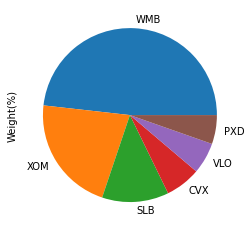

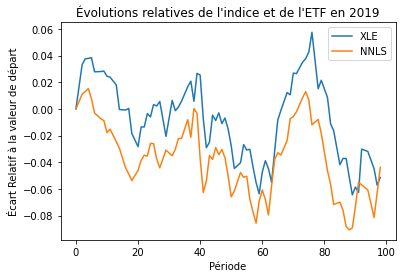

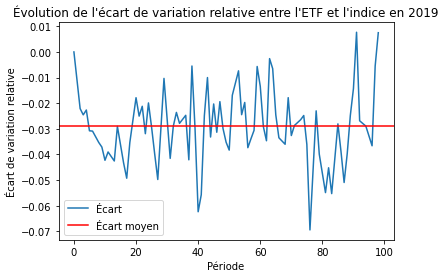

TrackingError sur 2019:
0.03261123169102075

2020: Confrontation de l'ETF à l'évolution effective de l'indice post-apprentissage



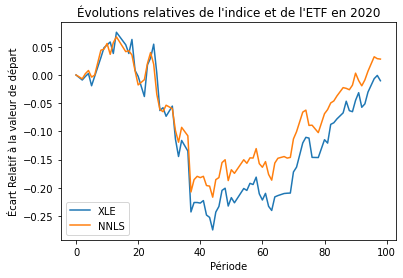

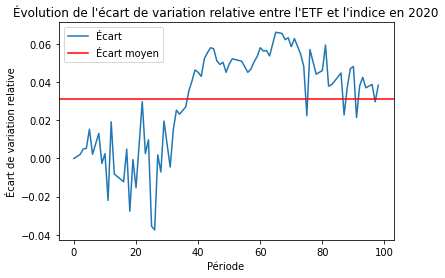

TrackingError sur 2020:
0.04088521127769959


In [ ]:
# Application aux 10 plus grands actifs de XLE
Etf(Top_10_XLE)

2019: Période d'apprentissage

NNLS Residual 8.61309
result of the NNLS =  (array([0.        , 0.        , 0.        , 0.44622593, 0.42818875,
       0.4558358 , 0.        , 0.01105928, 1.29289614, 0.        ]), 8.613094931845735)

Portfolio Allocation:


,Component,Weight(%)
0,TS,49.081059
1,REP.MC,17.304486
2,E,16.939676
3,EQNR,16.254946
4,LUNE.ST,0.419834
5,SHEL,0.000000
6,BP,0.000000
7,TTE,0.000000
8,NESTE.HE,0.000000
9,OMV.VI,0.000000



Leverage Factor: 2.6342059034804826


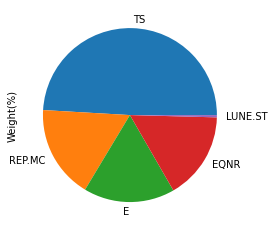

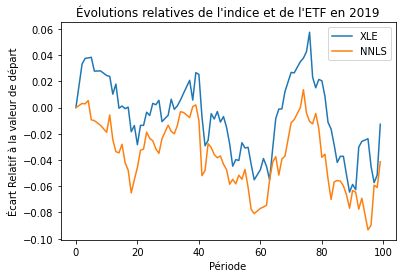

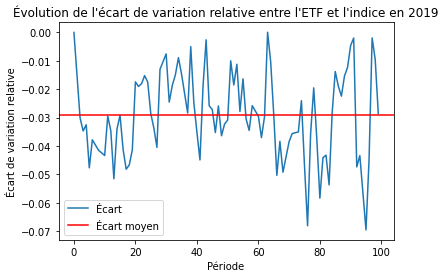

TrackingError sur 2019:
0.032852390853743474

2020: Confrontation de l'ETF à l'évolution effective de l'indice post-apprentissage



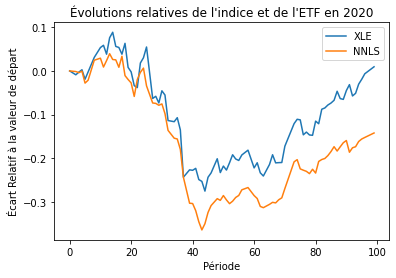

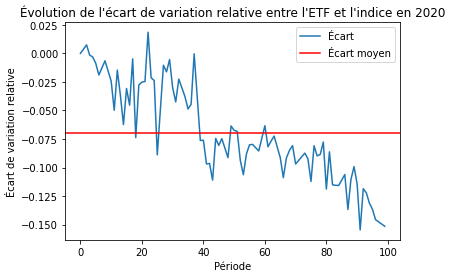

TrackingError sur 2020:
0.08192251118665678


In [ ]:
# Application aux 10 plus grands actifs de ANRJ MSCI
Etf(Top_10_ANRJ)

2019: Période d'apprentissage

NNLS Residual 9.33573
result of the NNLS =  (array([1.87290675]), 9.335726670333116)

Portfolio Allocation:


,Component,Weight(%)
0,IYE,100.0



Leverage Factor: 1.872906745860098


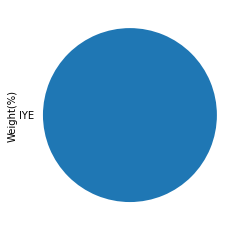

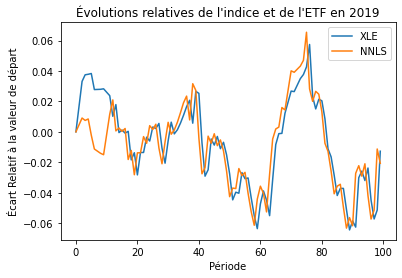

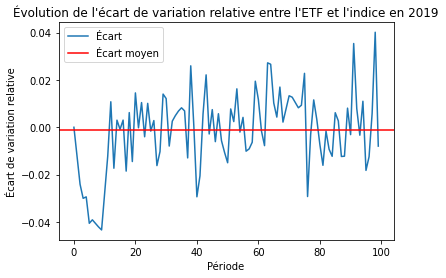

TrackingError sur 2019:
0.016164881290384552

2020: Confrontation de l'ETF à l'évolution effective de l'indice post-apprentissage



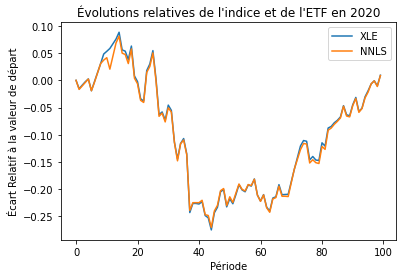

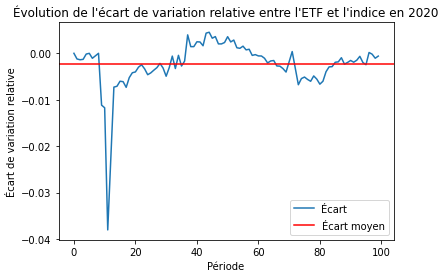

TrackingError sur 2020:
0.005369082165172095


In [ ]:
Etf(['IYE'])

On remarque une légère difference entre ce cours de XLE et celui obtenus en I.1.5, cela est du au traitement des données manquantes. Les données  manquantes pour les actifs de XLE utilisés précédemment et les actifs utilisés pour le I.2,2 ne figure pas le même jour, ainsi certaines valeurs du cours de l'indice apparaissent ici mais étaient absentes sur le premier graphique vice et versa.


# **II.   Réplication de l'indice XLE en utilisant les corrélations entre le cours de l'indice et celui des actifs** 




L'idée est d'allouer plus de poids à une composante si elle est plus corrélée avec la clôture réelle de l'indice.



## **1. Calcul des coefficients de corrélation et de corrélation partielle**


In [ ]:
L2_dataframe= pd.DataFrame(L2, columns=[etf_symbol])
L4_dataframe= pd.DataFrame(L4, columns=['XLE'])


In [ ]:
close = pd.concat([L2_dataframe,L4_dataframe],  axis=1)


In [ ]:
#on corrige les noms des colonnes  
close.columns = etf_symbol+['XLE']
close

,XOM,CVX,COP,EOG,SLB,MPC,PXD,OXY,VLO,WMB,XLE
0,69.48,119.85,64.61,82.39,40.40,59.67,150.87,40.70,92.88,23.20,59.70
1,70.13,120.60,65.00,83.65,40.07,60.47,151.78,40.15,94.42,23.81,61.68
2,70.02,120.34,64.67,83.81,40.65,60.97,152.08,39.89,95.10,23.84,61.94
3,70.29,120.33,64.60,83.38,40.79,60.66,151.80,39.71,95.24,23.94,61.96
4,69.94,119.68,63.72,82.66,39.43,61.61,150.93,39.01,95.27,23.80,61.99
...,...,...,...,...,...,...,...,...,...,...,...
78,69.03,116.13,52.71,76.69,33.69,46.72,126.94,45.06,78.01,23.88,57.90
79,68.30,115.81,51.47,75.92,34.10,47.81,128.22,45.58,78.12,23.56,57.79
80,67.65,116.95,51.78,75.02,31.65,45.40,123.01,43.96,76.00,22.92,57.02
81,70.49,117.74,53.87,78.52,32.34,44.63,122.72,43.70,78.74,23.11,56.28


Nous avons besoin des corrélations partielles entre chaque actif et l'indice. Nous avons essayer de la réaliser avec la fonctiom *pcorr* de la librairie *pinguin* mais des incompatibilités avec les versions de nos autres librairies nous ont poussé à construire une fonction manuelle pour calculer la matrice de corrélation partielle. 
Une partie de cette fonction est inspirée d'une fonction issue de https://snippets.cacher.io/snippet/1732e39b45b41b10da7a 


In [ ]:
def partial_corr(C):
    """
    prend le data frame contenant les cours des actifs et de l'indice
     et renvoie un data frame contenant les corrélations partielles entre les actifs et l'indice
    """
    columns_name=C.columns.tolist()
    C = np.asarray(C)
    p = C.shape[1] #nombre de variables
    P_corr = np.zeros((p, p), dtype=np.float)
    for i in range(p):
        P_corr[i, i] = 1
        for j in range(i + 1, p):
            idx = np.ones(p, dtype=np.bool) 
          
            idx[i] = False
            idx[j] = False
            
            beta_i = linalg.lstsq(C[:, idx], C[:, j])[0] 
            # lstsq Retourne la solution des moindres carrés d'une équation matricielle linéaire
            # C(sans les colonnes i et j)beta_i= C(colonne j uniquement)
            beta_j = linalg.lstsq(C[:, idx], C[:, i])[0]
             # C(sans les colonnes i et j)beta_j= C(colonne i uniquement)


            res_j = C[:, j] - C[:, idx].dot(beta_i)
            res_i = C[:, i] - C[:, idx].dot(beta_j)
 
            corr = stats.pearsonr(res_i, res_j)[0]
            #Le coefficient de corrélation de Pearson mesure la relation linéaire entre deux ensembles de données.
            P_corr[i, j] = corr
            P_corr[j, i] = corr
    
    partialcorr = pd.DataFrame(P_corr , columns=columns_name)
    return  partialcorr.loc[len(C[0])-1]

def corr_close(close):
  '''prend en entree le data frame contenant les cours des actifs et de l'indice et renvoie un
  data frame contenant les correlations et correlation partiel des actifs avec l'indice'''
  return pd.DataFrame({'Correlation':close.corr()['XLE'],'Partial Correlation':partial_corr(close)})



In [ ]:
correls=corr_close(close)
correls

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  del sys.path[0]


,Correlation,Partial Correlation
XOM,0.643564,0.223667
CVX,0.667479,0.137697
COP,0.728699,-0.014799
EOG,0.563537,-0.192319
SLB,0.839055,0.188775
MPC,0.273829,-0.120561
PXD,0.774603,0.283119
OXY,-0.108604,-0.048170
VLO,0.438343,0.201129
WMB,0.239173,0.310176


## **2. Création  du portefeuille** 


A partir des corrélations partielles nous avons attribué les différents poids dans l'ETF.

In [ ]:
weights_corr = correls['Partial Correlation'].apply(lambda x:max(0,x))[:-1]
#on ne veut que des corrélations partielles positives, si elles sont négatives on les fixe à 0

leverage_factor_corr = sum(weights_corr)
weights_corr = (weights_corr / leverage_factor_corr).to_dict()

allocation_corr = pd.DataFrame({'Holdings':list(weights_corr.keys()),'Weight(%)':np.multiply(list(weights_corr.values()),100)}).sort_values('Weight(%)',ascending=False)




Portfolio Allocation:


,Holdings,Weight(%)
0,WMB,23.068933
1,PXD,21.056541
2,XOM,16.634901
3,VLO,14.958694
4,SLB,14.039896
5,CVX,10.241034
6,COP,0.000000
7,EOG,0.000000
8,MPC,0.000000
9,OXY,0.000000



Leverage Factor: 1.344563352824654


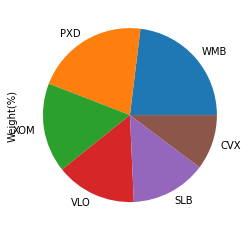

In [ ]:
print("\nPortfolio Allocation:")
allocation_corr.set_index('Holdings',inplace=True)
allocation_corr.plot.pie(y='Weight(%)',legend=None)
allocation_corr.reset_index(inplace=True)
display(allocation_corr)
print("\nLeverage Factor:", leverage_factor_corr)

## **3. Comparaison du cours de l'ETF réalisé et de l'indice de référence**

In [ ]:
Yfinal_corr = Yfinal.copy()
Yfinal_corr = Yfinal_corr[::-1]

In [ ]:
Yfinal_corr['NNLS Close'] = leverage_factor_corr*L2.dot(list(weights_corr.values()))
Yfinal_corr['XLE'] = L4
Yfinal_corr = Yfinal_corr[::-1]
Yfinal_corr.columns= ['XLE','Corr Close']
Yfinal_corr

,XLE,Corr Close
98,56.63,98.232288
97,56.28,95.833123
96,57.02,94.430951
94,57.79,96.981813
92,57.90,96.826496
...,...,...
5,61.99,108.841116
4,61.96,109.549341
3,61.94,109.483997
2,61.68,109.203903


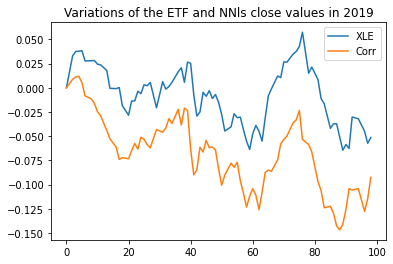

In [ ]:
Graph_corr = pd.DataFrame({'XLE': Evolve(Yfinal_corr['XLE']), 'Corr': Evolve(Yfinal_corr['Corr Close'])})

Graph_corr.plot()
plt.title('Variations of the ETF and NNls close values in 2019' )
plt.show()

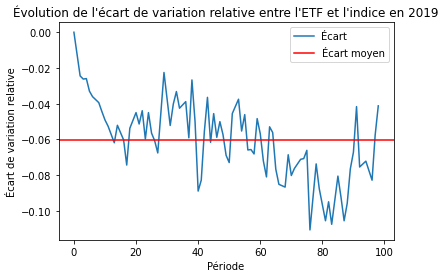

In [ ]:
#Evolution de l'écart de variation relative entre l'ETF et l'indice en 2019

Graph_corr['Dif']=Graph_corr['Corr']-Graph_corr['XLE']
Graph_corr['Dif'].plot()
G = Graph_corr['Dif'].mean()
plt.axhline(y= G, color='r', linestyle='-')
plt.title('Évolution de l\'écart de variation relative entre l\'ETF et l\'indice en 2019' )
plt.ylabel('Écart de variation relative')
plt.xlabel('Période')
plt.legend(['Écart','Écart moyen'])
plt.show()

In [ ]:
Graph_corr['Square']=Graph_corr['Dif']**2
TrackingError_corr = (Graph_corr['Square'].sum()/(len(Graph_corr['Square'])-1))**(1/2)
TrackingError_corr

0.06442691259387572

## **4. Réplication partielle anticipée** 


In [ ]:
Yfinal_corr_2020 = Yfinal_2020.copy()
Yfinal_corr_2020 = Yfinal_corr_2020[::-1]

In [ ]:
Yfinal_corr_2020['NNLS Close'] = leverage_factor_corr*L2_2020.dot(list(weights_corr.values()))
Yfinal_corr_2020['XLE'] = L4_2020
Yfinal_corr_2020 = Yfinal_corr_2020[::-1]
Yfinal_corr_2020.columns= ['XLE','Corr Close']
Yfinal_corr_2020

,XLE,Corr Close
98,37.83,74.883190
97,38.19,74.761548
96,37.97,74.570911
94,37.06,72.666692
93,36.26,71.442853
...,...,...
5,37.49,74.092133
4,38.32,74.784947
3,38.12,74.098332
2,37.88,73.749618


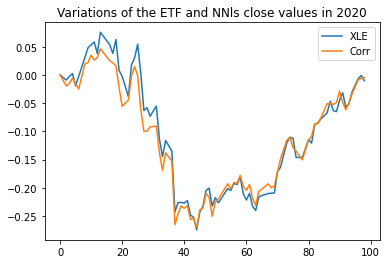

In [ ]:
Graph_corr_2020 = pd.DataFrame({'XLE': Evolve(Yfinal_corr_2020['XLE']), 'Corr': Evolve(Yfinal_corr_2020['Corr Close'])})

Graph_corr_2020.plot()
plt.title('Variations of the ETF and NNls close values in 2020' )
plt.show()

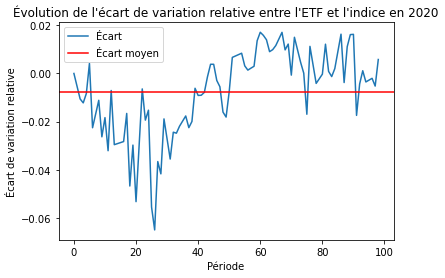

In [ ]:
#Evolution de l'écart de variation relative entre l'ETF et l'indice en 2019

Graph_corr_2020['Dif']=Graph_corr_2020['Corr']-Graph_corr_2020['XLE']
Graph_corr_2020['Dif'].plot()
G = Graph_corr_2020['Dif'].mean()
plt.axhline(y= G, color='r', linestyle='-')
plt.title('Évolution de l\'écart de variation relative entre l\'ETF et l\'indice en 2020' )
plt.ylabel('Écart de variation relative')
plt.xlabel('Période')
plt.legend(['Écart','Écart moyen'])
plt.show()

In [ ]:
Graph_corr_2020['Square']=Graph_corr_2020['Dif']**2
TrackingError_corr_2020 = (Graph_corr_2020['Square'].sum()/(len(Graph_corr_2020['Square'])-1))**(1/2)
TrackingError_corr_2020

0.01950095877458433

## **5. Création de la fonction globale applicable à tous types d'actions**

In [ ]:
def ETF_Corr(Liste_Actions):

  print('2019: Période d\'apprentissage')
  print('')

  #Récolte des données pour 2019

  df = pd.DataFrame({Holding : holdings_scrapping_2019(Holding).iloc(1)[4] for Holding in Liste_Actions})
  Ytest = pd.DataFrame({'XLE' : holdings_scrapping_2019('XLE').iloc(1)[4]})

  #Nettoyage des bases de données

  L = []
  for k in Liste_Actions:
    for j in range(100):
      if df[k][j].endswith('Dividend'):
        L.append(j)
  for j in range(100):
    if Ytest["XLE"][j].endswith('Dividend'):
      L.append(j)
  Closes_XLE10 = df.drop(L)
  Yfinal = Ytest.drop(L)

  #Création du Portefeuille

  A=Closes_XLE10.values
  A.shape
  b=Yfinal.values
  b.shape
  b_vect=np.reshape(b, -1)
  n,m = A.shape
  L2 = []
  for i in range(n):
    L3 = []
    for j in range(m):
      L3.append(float(A[i,j]))
    L2.append(L3)
  L2 = np.array(L2)
  C = Yfinal['XLE'].values
  n = len(C)
  L4 = []
  for i in range(n):
    L4.append(float(C[i]))
  L4 = np.array(L4)

  #Calcul des coefficients de corrélation et de corrélation partielle

  L2_dataframe= pd.DataFrame(L2, columns=[Liste_Actions])
  L4_dataframe= pd.DataFrame(L4, columns=['XLE'])
  close = pd.concat([L2_dataframe,L4_dataframe],  axis=1)
  close.columns = Liste_Actions+['XLE']
  correls=corr_close(close)
  weights_corr = correls['Partial Correlation'].apply(lambda x:max(0,x))[:-1]

  #on ne veut que des corrélations partielles positives, si elles sont négatives on les fixe à 0
  leverage_factor_corr = sum(weights_corr)
  weights_corr = (weights_corr / leverage_factor_corr).to_dict()
  allocation_corr = pd.DataFrame({'Holdings':list(weights_corr.keys()),'Weight(%)':np.multiply(list(weights_corr.values()),100)}).sort_values('Weight(%)',ascending=False)
  print("\nPortfolio Allocation:")
  allocation_corr.set_index('Holdings',inplace=True)
  allocation_corr.plot.pie(y='Weight(%)',legend=None)
  allocation_corr.reset_index(inplace=True)
  display(allocation_corr)
  print("\nLeverage Factor:", leverage_factor_corr)
  Yfinal_corr = Yfinal.copy()
  Yfinal_corr['NNLS Close'] = leverage_factor_corr*L2.dot(list(weights_corr.values()))
  Yfinal_corr['XLE'] = L4
  Yfinal_corr.columns= ['XLE','Corr Close']
  Yfinal_corr = Yfinal_corr[::-1]

  #Traçage des évolutions relatives de l'indice et de l'Etf en 2019

  Graph_corr = pd.DataFrame({'XLE': Evolve(Yfinal_corr['XLE']), 'Corr': Evolve(Yfinal_corr['Corr Close'])})
  Graph_corr.plot()
  plt.title('Évolutions relatives de l\'indice et de l\'ETF en 2019' )
  plt.ylabel('Écart Relatif à la valeur de départ')
  plt.xlabel('Période')
  plt.show()

  #Evolution de l'écart de variation relative entre l'ETF et l'indice en 2019

  Graph_corr['Dif']=Graph_corr['Corr']-Graph_corr['XLE']
  Graph_corr['Dif'].plot()
  G = Graph_corr['Dif'].mean()
  plt.axhline(y= G, color='r', linestyle='-')
  plt.title('Évolution de l\'écart de variation relative entre l\'ETF et l\'indice en 2019' )
  plt.ylabel('Écart de variation relative')
  plt.xlabel('Période')
  plt.legend(['Écart','Écart moyen'])
  plt.show()

  #Evaluation de l'erreur de suivi sur la période d'apprentissage (i.e 2019)

  Graph_corr['Square']=Graph_corr['Dif']**2
  TrackingError_corr = (Graph_corr['Square'].sum()/(len(Graph_corr['Square'])-1))**(1/2)
  print('TrackingError sur 2019:')
  print(TrackingError_corr)

  print('')
  print('2020: Confrontation de l\'ETF à l\'évolution effective de l\'indice post-apprentissage')
  print('')

  #Récolte des données pour 2020

  df_2020 = pd.DataFrame({Holding : holdings_scrapping_2020(Holding).iloc(1)[4] for Holding in Liste_Actions})
  Ytest_2020 = pd.DataFrame({'XLE' : holdings_scrapping_2020('XLE').iloc(1)[4]})

  #Nettoyage des bases de données

  L_2020 = []
  for k in Liste_Actions:
    for j in range(100):
      if df_2020[k][j].endswith('Dividend'):
        L_2020.append(j)
  for j in range(100):
    if Ytest_2020["XLE"][j].endswith('Dividend'):
      L_2020.append(j)
  Closes_XLE10_2020 = df_2020.drop(L_2020)
  Yfinal_2020 = Ytest_2020.drop(L_2020)

  #Mise en Application du portefeuille établi en 2019 pour 2020

  A_2020=Closes_XLE10_2020.values
  b_2020=Yfinal_2020.values
  n,m = A_2020.shape
  L2_2020 = []
  for i in range(n):
    L3_2020 = []
    for j in range(m):
      L3_2020.append(float(A_2020[i,j]))
    L2_2020.append(L3_2020)
  L2_2020 = np.array(L2_2020)
  C_2020 = Yfinal_2020['XLE'].values
  n = len(C_2020)
  L4_2020 = []
  for i in range(n):
    L4_2020.append(float(C_2020[i]))
  L4_2020 = np.array(L4_2020)

  #Traçage des évolutions relatives de l'indice et de l'Etf en 2020

  Yfinal_corr_2020 = Yfinal_2020.copy()
  Yfinal_corr_2020['NNLS Close'] = leverage_factor_corr*L2_2020.dot(list(weights_corr.values()))
  Yfinal_corr_2020['XLE'] = L4_2020
  Yfinal_corr_2020 = Yfinal_corr_2020[::-1]
  Yfinal_corr_2020.columns= ['XLE','Corr Close']
  Graph_corr_2020 = pd.DataFrame({'XLE': Evolve(Yfinal_corr_2020['XLE']), 'Corr': Evolve(Yfinal_corr_2020['Corr Close'])})
  Graph_corr_2020.plot()
  plt.title('Évolutions relatives de l\'indice et de l\'ETF en 2020' )
  plt.ylabel('Écart Relatif à la valeur de départ')
  plt.xlabel('Période')
  plt.show()

  #Evolution de l'écart de variation relative entre l'ETF et l'indice en 2019
  
  Graph_corr_2020['Dif']=Graph_corr_2020['Corr']-Graph_corr_2020['XLE']
  Graph_corr_2020['Dif'].plot()
  G = Graph_corr_2020['Dif'].mean()
  plt.axhline(y= G, color='r', linestyle='-')
  plt.title('Évolution de l\'écart de variation relative entre l\'ETF et l\'indice en 2020' )
  plt.ylabel('Écart de variation relative')
  plt.xlabel('Période')
  plt.legend(['Écart','Écart moyen'])
  plt.show()

  #Evaluation de l'erreur de suivi sur la période d'apprentissage (i.e 2019)

  Graph_corr_2020['Square']=Graph_corr_2020['Dif']**2
  TrackingError_corr_2020 = (Graph_corr_2020['Square'].sum()/(len(Graph_corr_2020['Square'])-1))**(1/2)
  print('TrackingError sur 2020:')
  print(TrackingError_corr_2020)
  



## **6. application aux 10 plus grands actifs de XLE et de ANRJ MSCI et comparaison avec IYE, un ETF professionnel**

2019: Période d'apprentissage


Portfolio Allocation:


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  del sys.path[0]


,Holdings,Weight(%)
0,WMB,23.068933
1,PXD,21.056541
2,XOM,16.634901
3,VLO,14.958694
4,SLB,14.039896
5,CVX,10.241034
6,COP,0.000000
7,EOG,0.000000
8,MPC,0.000000
9,OXY,0.000000



Leverage Factor: 1.344563352824654


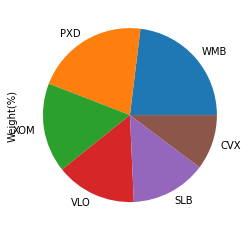

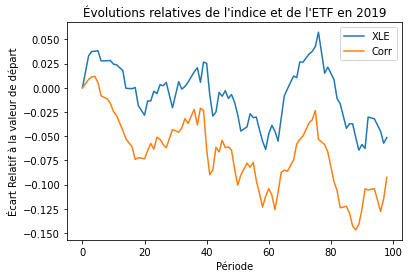

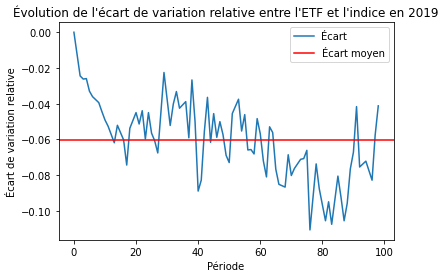

0.06442691259387572

2020: Confrontation de l'ETF à l'évolution effective de l'indice post-apprentissage



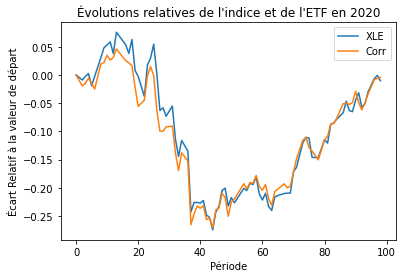

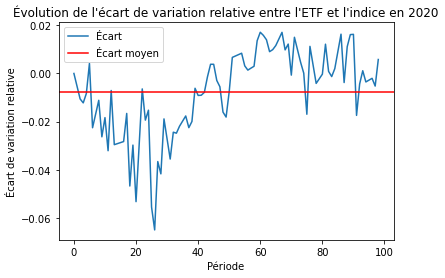

0.01950095877458433


In [ ]:
ETF_Corr(Top_10_XLE)

2019: Période d'apprentissage


Portfolio Allocation:


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  del sys.path[0]


,Holdings,Weight(%)
0,TS,40.397263
1,REP.MC,25.096084
2,E,17.176725
3,EQNR,9.709707
4,TTE,4.899888
5,LUNE.ST,2.531827
6,NESTE.HE,0.188507
7,SHEL,0.000000
8,BP,0.000000
9,OMV.VI,0.000000



Leverage Factor: 1.5201324303353072


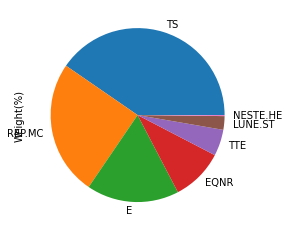

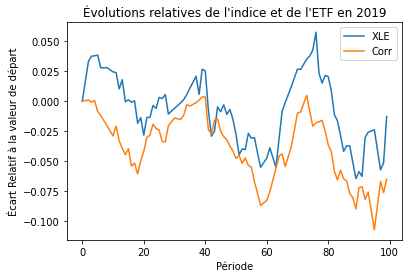

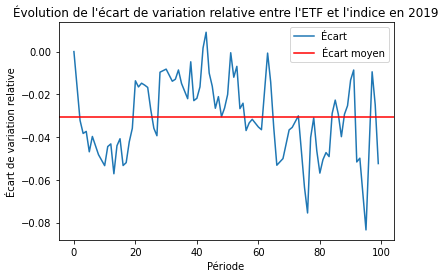

0.03564906101212824

2020: Confrontation de l'ETF à l'évolution effective de l'indice post-apprentissage



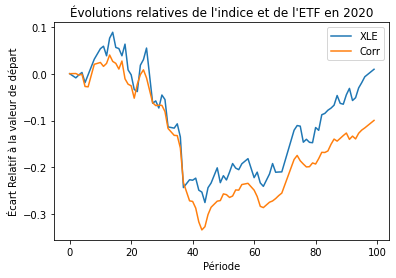

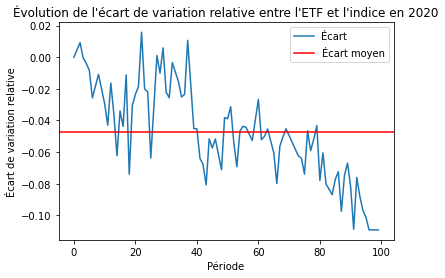

0.056402843075347


In [ ]:
ETF_Corr(Top_10_ANRJ)

2019: Période d'apprentissage


Portfolio Allocation:


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  del sys.path[0]


,Holdings,Weight(%)
0,IYE,100.0



Leverage Factor: 0.8336565707069681


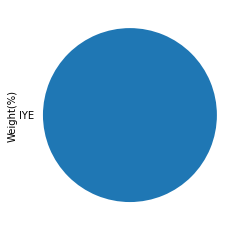

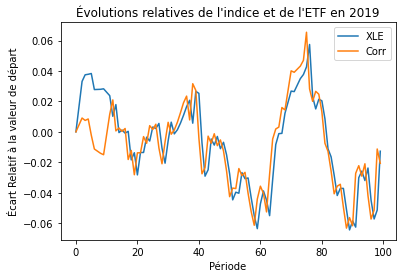

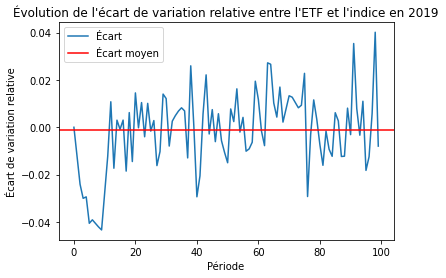

TrackingError sur 2019:
0.016164881290384552

2020: Confrontation de l'ETF à l'évolution effective de l'indice post-apprentissage



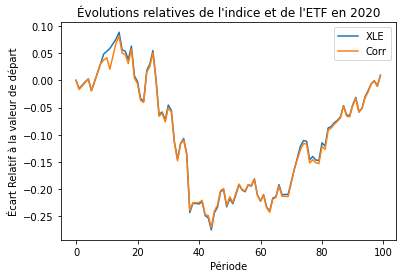

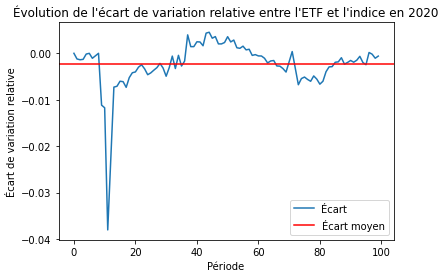

TrackingError sur 2020:
0.005369082165172077


In [ ]:
ETF_Corr(['IYE'])

# **III. Résultats obtenus**



In [ ]:
#Création d'un tableau comparatif des erreurs de suivi

Tableau = pd.DataFrame({'ETF' : ['XLE']*2+['ANRJ']*2+['IYE']*2, 'Année' : [2019,2020]*3, 'TrackingError NNLS' : [0.03261123169102075,0.04088521127769959,0.032852390853743474,0.08192251118665678,0.016164881290384552,0.005369082165172095],'TrackingError Corr' : [0.06442691259387572,0.01950095877458433,0.03564906101212824,0.056402843075347,0.016164881290384552,0.005369082165172077]})
Tableau

,ETF,Année,TrackingError NNLS,TrackingError Corr
0,XLE,2019,0.032611,0.064427
1,XLE,2020,0.040885,0.019501
2,ANRJ,2019,0.032852,0.035649
3,ANRJ,2020,0.081923,0.056403
4,IYE,2019,0.016165,0.016165
5,IYE,2020,0.005369,0.005369


A partir du tableau précédent et des résultats obtenus, l'optimisation des portefeuilles est satisfaisante. En outre, l'erreur de suivi est généralement plus importante pour l'application des portefeuille sur 2020 qu'elle ne l'est pour la période sur laquelle on optimise le portefeuille ce qui est cohérent.

De plus on observe que cette différence d'erreur de suivi s'accentue pour les actifs européens moins directement liés à l'indice que les actifs américains le constituant, elle est de 5% contre 2% pour les actifs américains. 

Par ailleurs, lorsque comparés avec l'erreur de suivi d'un ETF professionnel(IYE) repliquant l'indice d'étude (XLE), les erreurs de suivi n'ont qu'un ordre de grandeur d'écart, ce qui souligne la qualité d'optimisation. En outre l'ETF professionnel est ajusté en continue ce qui n'est pas le cas des ETF que nous avons constitué.

# **IV. Conclusion** 

A la lumière de nos résultats, nous avons réalisé un programme satisfaisant pour répliquer des indices boursiers.
Un approfondissement potentiellement pertinent de notre code serait d'optimiser la selection des 10 actions de l'indice. En effet nous avons sélectionné les actions qui ont la plus grandes part dans l'ETF (75% au total) mais on pourrait essayer de selectionner les actifs qui sont le plus correle a l'indice par exemple. 

De plus nous avons intuitivement choisis de constituer notre ETF d'actions Européennes a partir d'actifs du même secteurs, il serait intéressant d'effectuer notre allocation de portefeuille sur une plus grande liste d'actifs plus divers. Et regarder si des actifs autres que ceux du secteur de l’énergie peuvent ou non mieux suivre d'evolution de l'indice. 

Enfin une dernière piste d'approfondissement serait de limiter notre portefeuille à un certain montant pour optimiser les placements d'un étudiant par exemple. 

# **Difficultés rencontrées** 

Lors de la réplication d’EFT, nous nous somme heurté à de multiples  difficultés, la plupart
étant prévisibles, comme la récupération des données.
Dans un premier temps, nous avons dû choisir sur quel type de reproduction nous voulions travailler. Toutefois le **manque de données** sur le cours de certains actifs de notre indices nous a poussés à nous concentrer uniquement sur des replications partielles. 

 Il a ensuite fallu nous **approprier les différentes méthodes de scraping** pour automatiser la récupération des données. La premières nécessitait de télécharger un fichier exel sur internet avec toutes les données sur le cours des actifs et indices. Cette méthode se retrouve en annexe 1 et nous a permis de comparer l’evolution d'une réplication totale de XLE sur le marché et de l'indice. Néanmoins le manque de fichier qui decrivent le cours des actifs de l'indice nous a poussé à trouver une autre méthode qui utilise yahoo finance. Nous avons passé beaucoup de temps à déboguer les procédures existantes qui n’étaient pas a jour cependant, ça nous a permis de nous initier au concept de scapping et les résultats ont été la sources de grande satisfaction.

Une des plus grandes difficultés du projet n’avait pas été anticipé, le travail de groupe sur un même programme nous a posé beaucoup de problèmes. Nous avions commencé par coder directement sur un google colab mais une version écrasant une autre, nous avons perdu beaucoup de temps à corriger des coquilles issues d’une **mauvaise synchronisation de nos travail**. Pour régler ces difficultés nous avons décidé de travailler en parallèle sur des fichiers différents et de les retranscrire sur le fichier commun au fur et à mesure. La solution était d’autant plus optimale que nous avions réussi à décomposer le projet en plein de sous petits problèmes facilement répartis entre nous. 
 
 Une source de bogues communs des premières fonctions que nous réalisions au début était un **problème de type de valeur**. Les valeurs que l’on entrait dans une fonction et ceux des valeurs de sortie changeait souvent et il etait dificile de garder en tête la nature des objets que l'on manipulait. Des fonctions comme nnls prenaient en entrée un couple ( arrays,vecteur) alors que l'on manipulait jusque là des dataframe par exemple, ainsi il nous a fallu nous reporter de nombreuses fois aux documentations et rapporter ces informations sous forme de rappel tout au long de notre code.  
Aussi la **multiplicité des libraires** et de leurs **versions** nous a beaucoup posé problème, que ce soit pour l’importation des données ou pour certains calculs comme celui des corrélations partielles. Nous avons contourné le dernier problème en reconstruisant manuellement la fonction nécessaire.  




# Annexes 

## **annexe 1** comparaison ETF et indice

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  # Remove the CWD from sys.path while we load stuff.


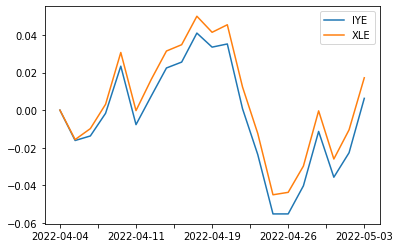

In [ ]:

#Comparaison d'un ETF deja fait et du cours reproduit

os.environ["IEX_TOKEN"] = "pk_c18a8e0954134419a6f28335609d0800"

XLE = Stock('XLE').get_chart(range='1m')
IYE = Stock('IYE').get_chart(range='1m')

XLE.date = pd.to_datetime(XLE.label)
IYE.date = pd.to_datetime(IYE.label)

def Evolve(Actif):
    return (Actif.close-Actif.close[0])/Actif.close[0]

    
Graph = pd.DataFrame({'IYE': Evolve(IYE), 'XLE': Evolve(XLE)})

Graph.plot()
plt.show()

##  **annexe 2 Test Unitaire**

In [ ]:
#pour tester les valeurs de correlations partielle que nous renvoie la fonction
#nous avons modifié la fin pour obtenir un array
def partial_corr_test(C):
  """
  prend le data frame contenant les cours des actifs et de l'indice
  et renvoie un data frame contenant les corrélations partielles entre les actifs et l'indice
  """
  columns_name=C.columns.tolist()
  C = np.asarray(C)
  p = C.shape[1] #nombre de variables
  P_corr = np.zeros((p, p), dtype=np.float)
  for i in range(p): 
    P_corr[i, i] = 1
    for j in range(i + 1, p):
      idx = np.ones(p, dtype=np.bool) 
      idx[i] = False
      idx[j] = False
            
      beta_i = linalg.lstsq(C[:, idx], C[:, j])[0] 
            # lstsq Retourne la solution des moindres carrés d'une équation matricielle linéaire
            # C(sans les colonnes i et j)beta_i= C(colonne j uniquement)
      beta_j = linalg.lstsq(C[:, idx], C[:, i])[0]
             # C(sans les colonnes i et j)beta_j= C(colonne i uniquement)


      res_j = C[:, j] - C[:, idx].dot(beta_i)
      res_i = C[:, i] - C[:, idx].dot(beta_j)
 
      corr = stats.pearsonr(res_i, res_j)[0]
            #Le coefficient de corrélation de Pearson mesure la relation linéaire entre deux ensembles de données.
      P_corr[i, j] = corr
      P_corr[j, i] = corr
  return  P_corr[10]


In [ ]:

import unittest

class Testing(unittest.TestCase):
  a = [ 0.22366679,  0.13769719, -0.01479881, -0.19231871,  0.18877529, -0.12056143,  0.28311854, -0.04817046,  0.20112912,  0.31017642, 1.]
  b = partial_corr_test(close)
  def Testing_Partial_coor(self):
    self.assertEqual(self.a, self.b)


if __name__ == '__main__':
  s = unittest.TestLoader().loadTestsFromTestCase(Testing)
  unittest.TextTestRunner().run(s)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from ipykernel import kernelapp as app

---------------------------